<a href="https://colab.research.google.com/github/SandeepMLDLNPL/Machine_Learning_Models/blob/main/Gradiant_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 

In [2]:
X = 2*np.random.rand(100,1)

In [4]:
y = 4+3*X+np.random.rand(100,1)

Normal Form of linear Regression 

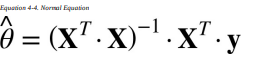

In [17]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.53119718],
       [2.97095867]])

In [23]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53119718],
       [10.47311451]])

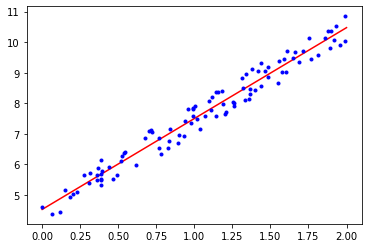

In [24]:
import matplotlib.pyplot as plt 
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.show()

The equivalent code using Scikit-Learn looks like this

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X,y)
model.intercept_,model.coef_

(array([4.53119718]), array([[2.97095867]]))

In [26]:
model.predict(X_new)

array([[ 4.53119718],
       [10.47311451]])

Linear Regression Using Batch Gradiant 

In [28]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iterations in range(n_iterations):
  gradiant = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradiant

In [29]:
theta

array([[4.53119718],
       [2.97095867]])

In [30]:
X_new_b.dot(theta)

array([[ 4.53119718],
       [10.47311451]])

In [31]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

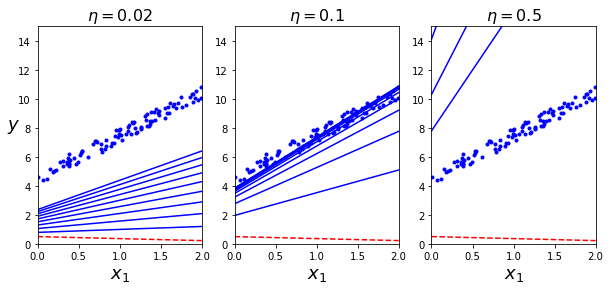

In [33]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

Linear Regression Using Stochastic Gradiant Descent

In [35]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [36]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.50231309]), array([2.97088766]))

In [38]:
sgd_reg.predict(X_new)

array([ 4.50231309, 10.44408842])